<a href="https://colab.research.google.com/github/Leonel-Ariel-Ruppel/READ-ME/blob/main/Maestr%C3%ADa_Teor%C3%ADa_14_NLP_y_Word_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Word Embeddings

Word Embeddings es una mejora con respecto a los esquemas más simples de word encoder, como el recuento de palabras y de frecuencias, que dan como resultado vectores grandes y dispersos (principalmente valores 0) que describen documentos pero no el significado de las palabras.

El Word Embedding designa un conjunto de métodos de aprendizaje que pretende representar las palabras de un texto mediante vectores de números reales. Word embeddings funcionan mediante el uso de un algoritmo para entrenar un conjunto de vectores de longitud fija y de valores continuos basados ​​en un gran corpus de texto. Cada palabra está representada por un punto en el espacio de embeddings y estos puntos se aprenden y se mueven en función de las palabras que rodean la palabra objetivo.

Define una palabra por parte del contexto que tiene, lo cual permite que el word embedding aprenda algo sobre el significado de las palabras. La representación vectorial de las palabras proporciona una proyección donde las palabras con significados similares se agrupan dentro del espacio.

## Preprocesamiento de texto

El procesamiento del lenguaje natural, o PNL, es un campo de la IA que tiene como objetivo comprender la semántica y las connotaciones de los lenguajes humanos naturales. El campo interdisciplinario combina técnicas de los campos de la lingüística y la informática, que se utilizan para crear tecnologías como chatbots y asistentes digitales.

###Natural Language Toolkit (NLTK)

se considera ampliamente la mejor librería de Python para NLP. NLTK es una librería esencial que admite tareas como clasificación, etiquetado, derivación, análisis y razonamiento semántico. A menudo lo eligen los principiantes que buscan involucrarse en los campos de la PNL y el aprendizaje automático.

###SpaCy
Es una librería NLP de código abierto diseñada explícitamente para uso en producción. SpaCy permite a los desarrolladores crear aplicaciones que pueden procesar y comprender grandes volúmenes de texto. La librería de Python se usa a menudo para construir sistemas de comprensión del lenguaje natural y sistemas de extracción de información.
Uno de los otros beneficios principales de spaCy es que admite tokenización para más de 49 idiomas gracias a que está cargado con modelos estadísticos y vectores de palabras previamente entrenados. Algunos de los principales casos de uso de spaCy incluyen autocompletado de búsqueda, autocorrección, análisis de reseñas en línea, extracción de temas clave y mucho más.

###Gensim.
Originalmente desarrollada para el modelado de temas, la librería ahora se usa para una variedad de tareas de NLP, como la indexación de documentos.


In [ ]:
pip install --upgrade gensim

In [ ]:
pip install nltk #Natural Language Toolkit

In [ ]:
import pandas as pd
import numpy as np

from gensim.models import Word2Vec
import gensim

from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##Tokenización

In [ ]:
text = '''En el último año, el precio de los combustibles subió 156 puntos porcentuales más que el de los salarios.'''
char_remov = [".", ","]
for char in char_remov:
  text = text.replace(char, "")
text = text.lower()
print(word_tokenize(text))

['en', 'el', 'último', 'año', 'el', 'precio', 'de', 'los', 'combustibles', 'subió', '156', 'puntos', 'porcentuales', 'más', 'que', 'el', 'de', 'los', 'salarios']


In [ ]:
text = "Down, down, down. Would the fall _never_ come to an end?"
print(sent_tokenize(text))

['Down, down, down.', 'Would the fall _never_ come to an end?']


##Limpieza de stopwords

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

example_sent = """Es muy alegre, adora el amarillo, su pájaro es el mirlo, su hora la noche, su puente el Pont des Arts."""
example_sent = example_sent.lower().replace(",", "")

stop_words = set(stopwords.words('spanish'))

word_tokens = word_tokenize(example_sent)
#converts the words in word_tokens to lower case and then checks whether
#they are present in stop_words or not

filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
#with no lower case conversion

filtered_sentence = []

for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

print(word_tokens)
print(filtered_sentence)

['es', 'muy', 'alegre', 'adora', 'el', 'amarillo', 'su', 'pájaro', 'es', 'el', 'mirlo', 'su', 'hora', 'la', 'noche', 'su', 'puente', 'el', 'pont', 'des', 'arts', '.']
['alegre', 'adora', 'amarillo', 'pájaro', 'mirlo', 'hora', 'noche', 'puente', 'pont', 'des', 'arts', '.']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


##Keywords

Yake es un método no supervisado de extracción automática de palabras clave  que se basa en características estadísticas de texto extraídas de documentos individuales para seleccionar las palabras clave más importantes de un texto.

In [ ]:
pip install yake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.2/60.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.5 MB/s eta 0:00:00


In [ ]:
import yake

In [ ]:
title = "VECTORIZATION OF TEXT USING DATA MINING METHODS"
text = '''In the text mining tasks, textual representation should be not only efficient but also interpretable,
        as this enables an understanding of the operational logic underlying the data mining models.
        Traditional text vectorization methods such as TF-IDF and bag-of-words are effective and
        characterized by intuitive interpretability, but suffer from the «curse of dimensionality»,
        and they are unable to capture the meanings of words. On the other hand, modern distributed methods
        effectively capture the hidden semantics, but they are computationally intensive, time-consuming,
        and uninterpretable. This article proposes a new text vectorization method called Bag of weighted Concepts BoWC
        that presents a document according to the concepts’ information it contains. The proposed method creates concepts
        by clustering word vectors (i.e. word embedding) then uses the frequencies of these concept clusters to represent
        document vectors. To enrich the resulted document representation, a new modified weighting function is proposed
        for weighting concepts based on statistics extracted from word embedding information. The generated vectors are
        characterized by interpretability, low dimensionality, high accuracy, and low computational costs when used in
        data mining tasks. The proposed method has been tested on five different benchmark datasets in two data mining
        tasks; document clustering and classification, and compared with several baselines, including Bag-of-words, TF-IDF,
        Averaged GloVe, Bag-of-Concepts, and VLAC. The results indicate that BoWC outperforms most baselines and gives 7% better accuracy on average'''
full_text = title +", "+ text
print("The whole text to be usedn",full_text)

The whole text to be usedn VECTORIZATION OF TEXT USING DATA MINING METHODS, In the text mining tasks, textual representation should be not only efficient but also interpretable, as this enables an understanding of the operational logic underlying the data mining models. Traditional text vectorization methods such as TF-IDF and bag-of-words are effective and characterized by intuitive interpretability, but suffer from the «curse of dimensionality», and they are unable to capture the meanings of words. On the other hand, modern distributed methods effectively capture the hidden semantics, but they are computationally intensive, time-consuming, and uninterpretable. This article proposes a new text vectorization method called Bag of weighted Concepts BoWC that presents a document according to the concepts’ information it contains. The proposed method creates concepts by clustering word vectors (i.e. word embedding) then uses the frequencies of these concept clusters to represent document v

In [ ]:
kw_extractor = yake.KeywordExtractor(top=10, stopwords=None)
keywords = kw_extractor.extract_keywords(full_text)
for kw, v in keywords:
  print("Keyphrase: ",kw, ": score", v)

Keyphrase:  operational logic underlying : score 0.008502958451052589
Keyphrase:  text vectorization methods : score 0.015613284939549285
Keyphrase:  text vectorization : score 0.02310717508615897
Keyphrase:  Traditional text vectorization : score 0.02325791341228692
Keyphrase:  data mining models : score 0.02830809004349318
Keyphrase:  data mining tasks : score 0.033863083795882626
Keyphrase:  DATA MINING : score 0.03618462463953267
Keyphrase:  text mining tasks : score 0.037652251074155374
Keyphrase:  enables an understanding : score 0.04036782511075581
Keyphrase:  operational logic : score 0.04036782511075581


##Word Cloud

[('Natural Language Processing', 0.02100249013859125), ('Language Processing', 0.04163335302639552), ('Natural Language', 0.048148820863336377), ('Artificial Intelligence', 0.06657427591685054), ('Alan Mathison Turing', 0.06812525384060124), ('Language Processing started', 0.07604425290902747), ('human languages', 0.08215351904804695), ('NLP stands', 0.09173112596477705), ('Language', 0.10178153594306494), ('process human languages', 0.11865807800247614), ('Processing', 0.12586811799925435), ('Intelligence', 0.12825620909446891), ('Natural', 0.13778435888897436), ('Alan Mathison', 0.15153101048626974), ('Mathison Turing', 0.15153101048626974), ('Computing Machinery', 0.15153101048626974), ('Mathison Turing published', 0.15160281730925312), ('languages', 0.1526723039145974), ('Artificial', 0.15269328890550202), ('NLP', 0.18058428305612767)]


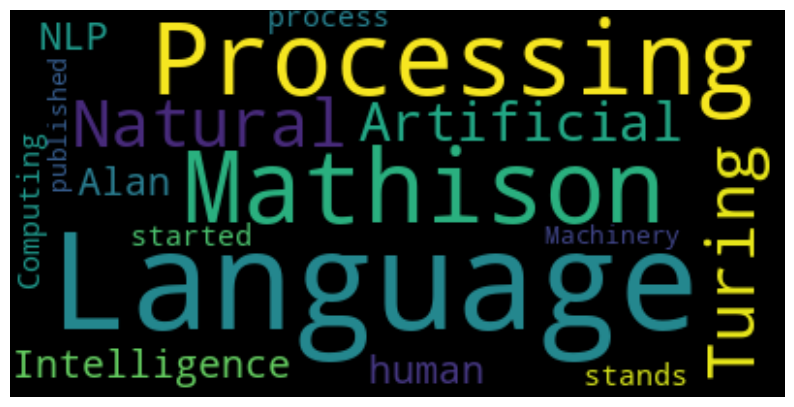

In [ ]:
# Importing libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import yake

# Initializing the YAKE instance
yake_kw = yake.KeywordExtractor()

# Input text
input_text = '''
NLP stands for Natural Language Processing.
It is the branch of Artificial Intelligence that gives the ability to machine understand
and process human languages. Human languages can be in the form of text or audio format.
Natural Language Processing started in 1950 When Alan Mathison Turing published
an article in the name Computing Machinery and Intelligence.
It is based on Artificial intelligence. It talks about automatic interpretation and
generation of natural language.
As the technology evolved, different approaches have come to deal with NLP tasks.
'''

# Extracting keywords
KeyWords = yake_kw.extract_keywords(input_text)

# Displaying the keywords
print(KeyWords)

# Extracting keywords
keywords = [kw for kw, _ in KeyWords] #extraigo las palabras individuales de los tuples (frases) dentro de keywords

# Generate WordCloud
wordcloud = WordCloud().generate(' '.join(keywords)) #voy armando con la funcion generate un string formado de las palabras separadas por el espacio.

# WordCloud.  el tamaño de las palabras depende la frecuencia que tiene cada una.
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear') #bilinear interpolation sirve para ubicar las palabras de acuerdo a sus valores entre los ejes
plt.axis('off')
plt.show()

Vamos a ver ejemplos de CBOW (Continuous Bag of Words) y SG (Skip Grams), dos métodos de word2vec, .  



## Similitud de Coseno

La similitud del coseno se utiliza frecuentemente en el procesamiento del lenguaje natural (PLN) para medir distancias entre documentos y textos. La similitud entre dos vectores en un espacio producto interno se mide mediante la similitud del coseno.  Analiza si dos vectores apuntan aproximadamente  en la misma dirección midiendo el coseno del ángulo entre ellos. En el análisis de texto, se utiliza con frecuencia para medir la similitud de documentos.  Es una buena métrica para manejar efectos de escala y longitud, y se recomienda cuando la magnitud de las características no importa.  Por ejemplo, la similitud del coseno puede encontrar que un gato se parece más a un tigre porque ambos pertenecen a la familia felina.

In [ ]:
Amazon = pd.read_csv("https://raw.githubusercontent.com/Lashanghainesa/dataset/main/Reviews.csv")
print(Amazon.head())

                                                Text
0  I have bought several of the Vitality canned d...
1  Product arrived labeled as Jumbo Salted Peanut...
2  This is a confection that has been around a fe...
3  If you are looking for the secret ingredient i...
4  Great taffy at a great price.  There was a wid...


creamos lista de palabras que tiene el corpus:

In [ ]:
corpus_text = 'n'.join(Amazon[:1000]['Text'])
data = []
# iterate through each sentence in the file
for i in sent_tokenize(corpus_text):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

Existen dos variantes de Word2vec, Continuous Bag Of Words (CBOW) y Skip-gram.

En la siguiente imagen, la palabra del recuadro azul se llama palabra objetivo y las palabras de los recuadros blancos se llaman palabras de contexto en una ventana de tamaño 5.

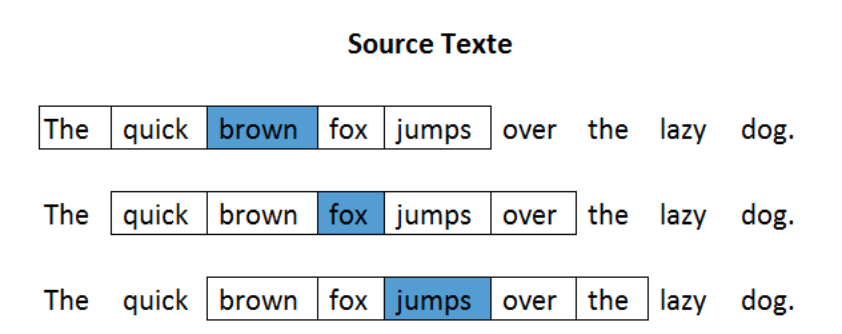


CBOW : El modelo se alimenta del contexto y predice la palabra objetivo. El resultado de la capa oculta es la nueva representación de la palabra (ℎ1, …, ℎ𝑁).

Skip Gram: El modelo se alimenta de la palabra objetivo y predice las palabras del contexto. El resultado de la capa oculta es la nueva representación de la palabra (ℎ1, …, ℎ𝑁).

###Construir modelo de Word2Vec utilizando Gensim



Principales parámetros del modelo:

size: (default 100) número de dimensiones del embedding, es decir, el tamaño del vector dense que representa cada palabra.

window: (default 5) la máxima distancia entre la palabra objetivo y las palabras de contexto.

min_count: (default 5) Cantidad mínima de palabras que aparecen para el entrenamiento.  Si una palabra aparece menos de este número, no será considerada.  

sg: (default 0 or CBOW) algoritmo de entrenamiento, CBOW (0) o skip gram (1).

In [ ]:
# Create CBOW model
#cuando seteamos min_count = 1 estamos usando todas las palabras.
#vector_size = 100 cada palabra será reprensentada por un vector dense de este tamaño.
model1 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100, window = 5, sg=0)

Luego del entrenamiento, model1 va a contener el word embeddings aprendido que mapea las palabras a los vectores dense en un espacio vectorial continuo, que podrá ser utilizado para varias tareas de NLP como similitud/analogía entre palabras o como input feature para los modelos de machine learning.

In [ ]:
# Print results
print("Cosine similarity between 'peanut' " +
      "and 'butter' - CBOW : ",
      model1.wv.similarity('peanut', 'butter'))

print("Cosine similarity between 'great' " +
      "and 'price' - CBOW : ",
      model1.wv.similarity('great', 'price'))

Cosine similarity between 'peanut' and 'butter' - CBOW :  0.99576354
Cosine similarity between 'great' and 'price' - CBOW :  0.99939173


In [ ]:
# Create Skip Gram model
model2 = gensim.models.Word2Vec(data, min_count = 1, vector_size = 100,window = 5, sg = 1)

In [ ]:
# Print results
print("Cosine similarity between 'peanut' " +
      "and 'butter' - Skip Gram : ",
      model2.wv.similarity('peanut', 'butter'))

print("Cosine similarity between 'great' " +
      "and 'price' - Skip Gram : ",
      model2.wv.similarity('great', 'price'))

Cosine similarity between 'peanut' and 'butter' - Skip Gram :  0.99437195
Cosine similarity between 'great' and 'price' - Skip Gram :  0.95197165


##Análisis de sentimiento

## Utilizando modelo de BOW

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer #RegexpTokenizer es una clase especial dentro de nltk
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [ ]:
#Dataset de review de peliculas
Movie_data = pd.read_csv("https://raw.githubusercontent.com/Lashanghainesa/dataset/main/IMDB%20Dataset.csv")
print(Movie_data.head())

                                            Sentence Sentiment
0  AVP2 is an awful movie. The dialogue was point...  negative
1  i stopped this movie at 48 minutes and change....  negative
2  No, *Hitch* is decidedly NOT a romantic-comedy...  negative
3  Based on the Korean legend, unknown creatures ...  negative
4  I'm not a big fan of the Stooges' slapstick, b...  negative


In [ ]:
#Pre-Processing and Bag of Word Vectorization using Count Vectorizer
token = RegexpTokenizer(r'[a-zA-Z0-9]+') #[a-zA-Z0-9]+ indica que el tokenizer separa las palabras alfanuméricas y descarta los signos de puntuación.
cv = CountVectorizer(stop_words='english', ngram_range = (1,1),tokenizer = token.tokenize) #ngram_range = (1,1) significa que considera palabra por palabra.  ngram_range = (1,2) sería considerar bigrams.
text_counts = cv.fit_transform(Movie_data['Sentence'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
#Splitting the data into trainig and testing
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, Movie_data['Sentiment'], test_size=0.25, random_state=5)

In [ ]:
#Entrenar el modelo usando Multinomial Naive Bayes classifier
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)

MultinomialNB()

In [ ]:
#calcular accuracy del modelo
predicted = MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print("Accuracuy Score: ",accuracy_score)

Accuracuy Score:  0.8445714285714285


## Utilizando LSTM

In [ ]:
import re #regular expressiong in python, sirve para manipulación de texto
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Lashanghainesa/dataset/main/IMDB%20Dataset.csv")
print(data.head())

                                            Sentence Sentiment
0  AVP2 is an awful movie. The dialogue was point...  negative
1  i stopped this movie at 48 minutes and change....  negative
2  No, *Hitch* is decidedly NOT a romantic-comedy...  negative
3  Based on the Korean legend, unknown creatures ...  negative
4  I'm not a big fan of the Stooges' slapstick, b...  negative


In [ ]:
#limpiar los stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
data['Sentence'] = data['Sentence'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data

,Sentence,Sentiment
0,"AVP2 awful movie. The dialogue pointless, acti...",negative
1,stopped movie 48 minutes change... know...mayb...,negative
2,"No, *Hitch* decidedly NOT romantic-comedy bili...",negative
3,"Based Korean legend, unknown creatures return ...",negative
4,"I'm big fan Stooges' slapstick, I find history...",negative
...,...,...
13994,"Thanks Warner Archive, I see mammoth variety s...",positive
13995,This story guy went see comedy turned horror m...,positive
13996,"This movie considered academy award, enjoy mov...",positive
13997,Big fat liar pretty funny movie. But I watchin...,positive


El siguiente paso es realizar la lematizacion.  Lematizacion consiste en obtener la raiz de una palabra, por ejemplo: trabajando --> trabajo.  

In [ ]:
nltk.download('wordnet')

#usamos wornetlemmatizer para realizar la tarea:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st

data['Sentence'] = data.Sentence.apply(lemmatize_text)
data

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Sentence,Sentiment
0,"AVP2 awful movie. The dialogue pointless, acti...",negative
1,stopped movie 48 minute change... know...maybe...,negative
2,"No, *Hitch* decidedly NOT romantic-comedy bili...",negative
3,"Based Korean legend, unknown creature return d...",negative
4,"I'm big fan Stooges' slapstick, I find history...",negative
...,...,...
13994,"Thanks Warner Archive, I see mammoth variety s...",positive
13995,This story guy went see comedy turned horror m...,positive
13996,"This movie considered academy award, enjoy mov...",positive
13997,Big fat liar pretty funny movie. But I watchin...,positive


Revisamos el largo de cada review y el % de las etiquetas para ver si es un dataset balanceado.

In [ ]:
s = 0.0
for i in data['Sentence']:
    word_list = i.split() #separo cada palabra por espacio en cada review.
    s = s + len(word_list) #voy sumando la cantidad de palabras de cada review.
print("Average length of each review : ",s/data.shape[0]) #cantidad total de palabras/cantidad de reviews.

pos = 0
for i in range(data.shape[0]):
    if data.iloc[i]['Sentiment'] == 'positive':
        pos = pos + 1
neg = data.shape[0]-pos


print("Percentage of reviews with positive sentiment is "+str(pos/data.shape[0]*100)+"%")
print("Percentage of reviews with negative sentiment is "+str(neg/data.shape[0]*100)+"%")

Average length of each review :  135.32995213943852
Percentage of reviews with positive sentiment is 49.989284948924926%
Percentage of reviews with negative sentiment is 50.010715051075074%


In [ ]:
#Usamos LabelEncoder() de sklearn.preprocessing para convertir las etiquetas positive y negativo en 1 y 0 respectivamente.
reviews = data['Sentence'].values #convierto la columna Sentence en un vector para luego poder procesarlo
labels = data['Sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [ ]:
encoded_labels

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
#Train-test split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, test_size=0.33, random_state=42) #stratify = encoded_labels)

Tokenizing: Keras’ inbuilt tokenizer API has fit the dataset, which splits the sentences into words and creates a dictionary of all unique words found and their uniquely assigned integers. Each sentence is converted into an array of integers representing all the individual words present in it.

Sequence Padding: The array representing each sentence in the dataset is filled with zeroes to the left to make the size of the array ten and bring all collections to the same length.

In [ ]:
# Hyperparameters of the model

vocab_size = 3000 #por convención.  estoy limitando a 3000 las palabras más usadas en mi base, el resto lo descarto.
oov_tok = '' #out of vocab words. asigno espacio vacío a estas palabras descartadas.
embedding_dim = 100
max_length = 200 # suele ser de 150 a 200.  indica el máximo tamaño de sequences luego de la tokenización.  Sequences más largos que max_length serán truncados, y sequences más cortos que max_length serán padded.
padding_type='post' #el padding va a ser después de la sequence, no antes (pre)
trunc_type='post'

# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index #un diccionario que contiene el indice de palabras.  lo dejo preparado para el posterior padding

# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences) #convierto la secuencia de palabras en números de acuerdo al word_index
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length) #padding

# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

modelo Keras sequential:

Una capa de embedding de 100 dimensiones convierte cada palabra en un vector de tamaño fijo (dense vector) de 100.  la dimensión de input es seteada como el vocab_size y la dimensión de output es 100.  Cada palabra en el input será representada por un vector de 100.  

Luego, una capa bidireccional LSTM de 64 units.  

Luego, una capa fully connected de 24 units con una funcion de activación RELU.

Una capa dense de 1 unit y función sigmoide arroja la probabilidad de que el sentimiento sea positiva.

In [ ]:
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# model summary
model.summary()
#parametro de embedding: 3000*100
#parametro de bidirectional: 2*4*[units(64)*input_dim(100)+units^2(64^2)+units(64)]
#parametro de dense: 128*24+24
#parametro de dense_1: 24*1+1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          300000    
                                                                 
 bidirectional (Bidirection  (None, 128)               84480     
 al)                                                             
                                                                 
 dense (Dense)               (None, 24)                3096      
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 387601 (1.48 MB)
Trainable params: 387601 (1.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
num_epochs = 5
history = model.fit(train_padded, train_labels,
                    epochs=num_epochs, verbose=1,
                    validation_split=0.1)

Epoch 1/5
264/264 [==============================] - 74s 259ms/step - loss: 0.5097 - accuracy: 0.7333 - val_loss: 0.3540 - val_accuracy: 0.8518
Epoch 2/5
264/264 [==============================] - 64s 243ms/step - loss: 0.3627 - accuracy: 0.8463 - val_loss: 0.3851 - val_accuracy: 0.8305
Epoch 3/5
264/264 [==============================] - 61s 231ms/step - loss: 0.2590 - accuracy: 0.9007 - val_loss: 0.4124 - val_accuracy: 0.8209
Epoch 4/5
264/264 [==============================] - 62s 236ms/step - loss: 0.2073 - accuracy: 0.9234 - val_loss: 0.3935 - val_accuracy: 0.8380
Epoch 5/5
264/264 [==============================] - 62s 236ms/step - loss: 0.1660 - accuracy: 0.9420 - val_loss: 0.4743 - val_accuracy: 0.8380


In [ ]:
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))
#Ideally, it would help prepare the model until the train and test losses converge.

145/145 [==============================] - 10s 60ms/step
Accuracy of prediction on test set :  0.8428571428571429


Usamos el modelo ya entrenado para predecir el sentimiento de nuevos reviews.  Para eso, cada nuevo texto tiene que ser tokenizado y padded antes de introducirlo al modelo.  El modelo predice la probabilidad y establecemos que cuando la prob es mayor a 0.5, el sentimiento es positivo, de lo contrario, negativo.

In [ ]:
# reviews on which we need to predict
sentence = ["The movie was very touching and heart whelming",
            "I have never seen a terrible movie like this",
            "the movie plot is terrible but it had good acting"]
# convert to a sequence
sequences = tokenizer.texts_to_sequences(sentence)
# pad the sequence
padded = pad_sequences(sequences, padding='post', maxlen=max_length)
# Get labels based on probability 1 if p>= 0.5 else 0
prediction = model.predict(padded)
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)

1/1 [==============================] - 0s 36ms/step
The movie was very touching and heart whelming
Predicted sentiment :  Positive
I have never seen a terrible movie like this
Predicted sentiment :  Negative
the movie plot is terrible but it had good acting
Predicted sentiment :  Negative


##Utilizando Transformers

In [ ]:
pip install transformers

In [ ]:
import transformers

In [ ]:
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
data = ["It was the best of times.", "It was the worst of times."]
sentiment_pipeline(data)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'POSITIVE', 'score': 0.999457061290741},
 {'label': 'NEGATIVE', 'score': 0.9997925162315369}]